In this notebook I have used the Fashion MNIST dataset and implemented Multiple Image Classification using ANN. 


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [6]:
np.max(x_train),np.min(x_train),np.mean(x_train)

(255, 0, 72.94035223214286)

In [7]:
np.max(x_test),np.min(x_test),np.mean(x_test)

(255, 0, 73.14656658163265)

In [8]:
class_names = ['0 T-shirt/top','1 Trouser','2 Pullover','3 Dress','4 Coat','5 Sandal','6 Shirt','7 Sneaker','8 Bag','9 Ankle boot']
print(class_names)

['0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


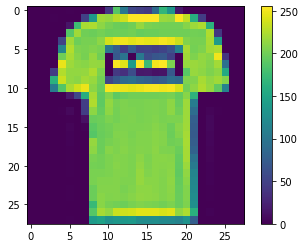

In [9]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

# Data Preprocessing

In [10]:
#Normalizing the Dataset
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
#Flattening the dataset
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

# Model Building

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [13]:
#Compiling and Training the model
model.compile(optimizer = 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model Fitting and Model Evaluation

In [15]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7006 - sparse_categorical_accuracy: 0.7544
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4253 - sparse_categorical_accuracy: 0.8461
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3838 - sparse_categorical_accuracy: 0.8591A: 3s 
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3596 - sparse_categorical_accuracy: 0.8685
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3478 - sparse_categorical_accuracy: 0.8723
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3386 - sparse_categorical_accuracy: 0.8747
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3260 - sparse_categorical_accuracy: 0.8790
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3152 - sparse_categorical_accuracy: 0.8825
Epoch 9/20
1875/1875 [====

In [16]:
#Model Evaluation
test_loss, test_accuracy= model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3273 - sparse_categorical_accuracy: 0.8877


In [17]:
#Model Prediction
y_pred = model.predict_classes(x_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [18]:
for i in range(0,10):
    print(y_pred[i], y_test[i]) #predicted and actual class

9 9
2 2
1 1
1 1
6 6
1 1
4 4
6 6
5 5
7 7


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cn = confusion_matrix(y_test, y_pred)
print(cn)

[[859   1  22  21   4   1  87   0   5   0]
 [  2 973   1  18   3   0   1   0   2   0]
 [ 19   1 850  13  69   0  46   0   2   0]
 [ 28   6  10 911  18   0  23   0   4   0]
 [  1   0 133  47 762   0  57   0   0   0]
 [  0   0   0   1   0 960   0  30   1   8]
 [133   0 114  28  53   0 662   0  10   0]
 [  0   0   0   0   0   6   0 974   0  20]
 [  4   0   4   6   0   1   3   4 978   0]
 [  0   0   0   0   0   8   1  43   0 948]]


In [20]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8877
